### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Analise Quantitativa


## 0. Preparando o Ambiente

In [3]:
import io               ## 'io' biblioteca usada sempre que for necessário manipular arquivos importados pelos comandos de 'pandas'
import matplotlib.pyplot as plt


# considerando que o database das lojas possuem a mesma estrutura, um dicionario será usado para simplificar as analises
# assim é possível usar loops para percorerrer os 4 database em uma mesma analise

lojas = {
    'Loja 1' : loja,
    'Loja 2' : loja2,
    'Loja 3' : loja3,
    'Loja 4' : loja4
}

# loja['Receita'] = round(loja['Preço'] - loja['Frete'],2)
# loja2['Receita'] = round(loja2['Preço'] - loja2['Frete'],2)
# loja3['Receita'] = round(loja3['Preço'] - loja3['Frete'],2)
# loja4['Receita'] = round(loja4['Preço'] - loja4['Frete'],2)

Anotações:
- Para realizar algumas dessas analises será criado uma lista de listas "resumo".

Cada item dessa lista será uma lista de 4 elementos composta por:

- (0) O nome da loja
- (1) seu respectivo faturamento total
- (2) média de avaliação
- (3) frete medio

Como a lista será baseado em elementos de outra lista, usaremos a estrutura de List Comprehension para criá-las

Posteriormente a lista de listas será transformada em um novo database, utilizando a função DataFrame da biblioteca panda

In [4]:
# List Comprehension
# novaLista = [ <                                                  expressao                                                  > for <  item  > in <listaInicial> if <condicao>]
resumo = [[nome, float(df['Preço'].sum()),
           round(float(df['Avaliação da compra'].mean()),2),
           round(float(df['Frete'].mean()),2),
           round(float(df['Frete'].sum()),2),
           len(df)] for nome, df in lojas.items()]

# transformando a lista "resumo" em um DataBase
resumo = pd.DataFrame(resumo, columns=['Loja', 'Faturamento Total', 'Avaliação Media', 'Frete Médio', 'Frete Total', 'Vendas Totais'])

##1. Análise do faturamento


In [5]:
# exibindo somente as colunas "Loja" e "Faturamento Total" da tabela "resumo", ordenada de forma decrescente pela coluna "Faturamento Total"
resumo[['Loja', 'Faturamento Total']].sort_values(by=['Faturamento Total'], ascending=False)


,Loja,Faturamento Total
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


## 2. Vendas por Categoria


In [6]:
# categoria = [ [loja, loja['Categoria do Produto'].value_counts()] for loja in lojas.items()]
# categoria

for loja, df_loja in lojas.items():
  print(f'As Categorias de Produto com maior volumetria de venda na {loja} são:')
  print(df_loja['Categoria do Produto'].value_counts())
  print('\n')

As Categorias de Produto com maior volumetria de venda na Loja 1 são:
Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64


As Categorias de Produto com maior volumetria de venda na Loja 2 são:
Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64


As Categorias de Produto com maior volumetria de venda na Loja 3 são:
Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
util

## 3. Média de Avaliação das Lojas

In [7]:
# exibindo somente as colunas "Loja" e "Avaliação Media" da tabela "resumo", ordenada de forma decrescente pela coluna "Avaliação Media"
resumo[['Loja', 'Avaliação Media']].sort_values(by=['Avaliação Media'], ascending=False)

,Loja,Avaliação Media
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


## 4. Produtos Mais e Menos Vendidos

In [8]:
for loja, df_loja in lojas.items():
  #cria um database auxiliar, que contem somente os produtos e suas contagens no databse original de cada loja
  produtos = df_loja['Produto'].value_counts().reset_index()
  produtos.columns = ['Produto', 'Quantidade']

  print(f'-------- Dados da {loja} ---------')

  print(f'Os produtos mais vendidos são:')
  #ordena os elementos da base auxiliar em ordem crescente, e exibe os 5 primeiros
  produtos.sort_values(by=["Quantidade"],ascending=False, inplace=True)
  print(produtos.head(5))
  print('\n')

  #ordena os elementos da base auxiliar em ordem decrescente, e exibe os 5 primeiros
  print(f'Os produtos menos vendidos são:')
  produtos.sort_values(by=["Quantidade"],ascending=True, inplace=True)
  print(produtos.head(5))

  print('\n')

-------- Dados da Loja 1 ---------
Os produtos mais vendidos são:
              Produto  Quantidade
0         Micro-ondas          60
1       TV Led UHD 4K          60
2       Guarda roupas          60
3  Secadora de roupas          58
4              Cômoda          56


Os produtos menos vendidos são:
              Produto  Quantidade
49            Headset          33
50       Celular ABXY          33
48  Panela de pressão          35
47           Pandeiro          36
45            Mochila          39


-------- Dados da Loja 2 ---------
Os produtos mais vendidos são:
                    Produto  Quantidade
0  Iniciando em programação          65
1               Micro-ondas          62
2                   Bateria          61
3                    Violão          58
4                  Pandeiro          58


Os produtos menos vendidos são:
              Produto  Quantidade
50  Jogo de tabuleiro          32
48     Mesa de jantar          34
49         Impressora          34
47           P

## 5. Frete Médio por Loja


In [9]:
# exibindo somente as colunas "Loja" e "Frete Médio" da tabela "resumo", ordenada de forma decrescente pela coluna "Frete Médio"
resumo[['Loja', 'Frete Médio']].sort_values(by=['Frete Médio'], ascending=False)

,Loja,Frete Médio
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


# Analise Qualitativa

In [36]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

cores = ['#A2C6F2',  # Azul claro suave
        '#D9D9D9',  # Cinza claro neutro
        '#F7C6D9',  # Rosa claro pastel
        '#C9B6E4']   # Roxo lavanda claro

## Analise financeira

A análise abaixo é útil caso o principal critério para decisão seja minimizar o impacto financeiro.

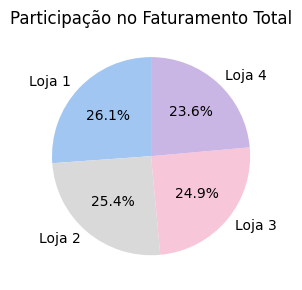

A Loja 1 possuí maior representatividade no faturamento total dentre as 4 lojas


In [38]:
# Define a coluna 'Loja' como índice temporário
resumo.set_index('Loja')['Faturamento Total'].plot.pie(
    colors=cores,
    autopct='%1.1f%%',  # Mostra as porcentagens
    figsize=(3, 3),     # Tamanho da figura
    startangle=90,      # Começa do topo
    ylabel='',          # Remove o rótulo do eixo Y
    title='Participação no Faturamento Total'
)

plt.tight_layout()
plt.show()

print(f'A Loja 1 possuí maior representatividade no faturamento total dentre as 4 lojas')

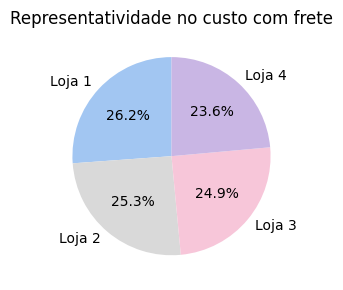

Porém a Loja 1 também possuí maior representatividade no custo com frente dentre as 4 lojas


In [37]:
# Define a coluna 'Loja' como índice temporário
resumo.set_index('Loja')['Frete Total'].plot.pie(
    colors=cores,
    autopct='%1.1f%%',  # Mostra as porcentagens
    figsize=(3, 3),     # Tamanho da figura
    startangle=90,      # Começa do topo
    ylabel='',          # Remove o rótulo do eixo Y
    title='Representatividade no custo com frete'
)

plt.tight_layout()
plt.show()

print(f'Porém a Loja 1 também possuí maior representatividade no custo com frente dentre as 4 lojas')

In [15]:
resumo

,Loja,Faturamento Total,Avaliação Media,Frete Médio,Frete Total,Vendas Totais,receita
0,Loja 1,1534509.12,3.98,34.69,81837.97,2359,1452671.15
1,Loja 2,1488459.06,4.04,33.62,79314.16,2359,1409144.90
2,Loja 3,1464025.03,4.05,33.07,78022.66,2359,1386002.37
3,Loja 4,1384497.58,4.00,31.28,73755.88,2358,1310741.70


## Analise experiencia
A analise abaixo é útil caso o principal critério de avaliação seja a satisfação dos consumidores

## Análise de mercado

A analise abaixo é útil caso o critério de decisão seja a representatividade na venda de alguma categoria de produtos

Digite a categoria de produto que deseja visualizar: esporte e lazer


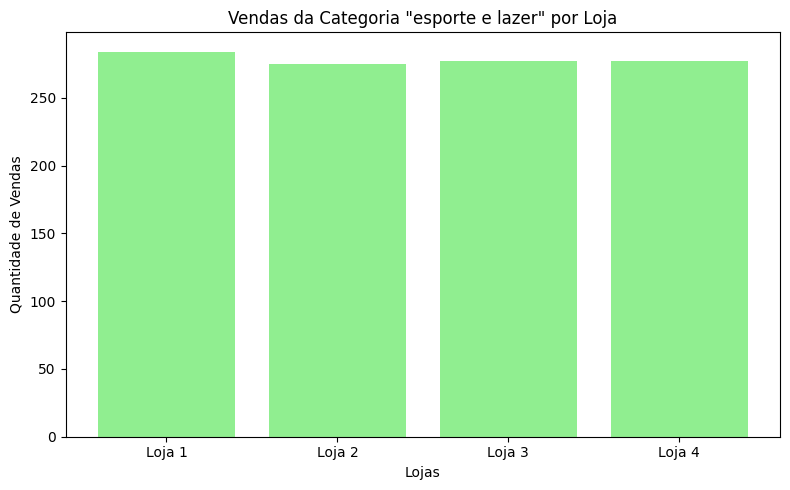

In [52]:
categoria_desejada = input("Digite a categoria de produto que deseja visualizar: ")

# 2. Criar lista para armazenar resultados
nomes_lojas = []
vendas_categoria = []

# 3. Contar quantas vezes essa categoria aparece em cada loja
for nome_loja, df_loja in lojas.items():
    count = df_loja[df_loja['Categoria do Produto'] == categoria_desejada].shape[0]
    nomes_lojas.append(nome_loja)
    vendas_categoria.append(count)

# 4. Plotar o gráfico
plt.figure(figsize=(8, 5))
plt.bar(nomes_lojas, vendas_categoria, color='lightgreen')
plt.title(f'Vendas da Categoria "{categoria_desejada}" por Loja')
plt.xlabel('Lojas')
plt.ylabel('Quantidade de Vendas')
plt.tight_layout()
plt.show()

# Relatório Final

A analise realizada tem como objetivo consolidar informações de vendas das lojas da rede Alura Store, afim de trazer indicadores que ajudem a definir qual das lojas é mais vantajosa ser liquidada em pró de um novo empreendimento.

Dentre os dados fornecedidos, a analise foi estrutura sobre 3 pilares
- Impacto financeiro
- Satisfação dos consumidores
- Representatividade no mercado


## **Impacto Financeiro:**

Observa-se que a Loja 1 possuí o maior valor total de vendas, e mesmo sendo a Loja com maior custo de frete, ao realizar o racional de "faturamento-custode frete" a Loja 1 segue proporcionando o maior valor em ganho financeiro, que representa 26% de todo ganho do grupo. Em contra partida, a Loja 4 tem o menor ganho, de aproximadamente 24%, o que é R$1,4MM a menos que a Loja 1

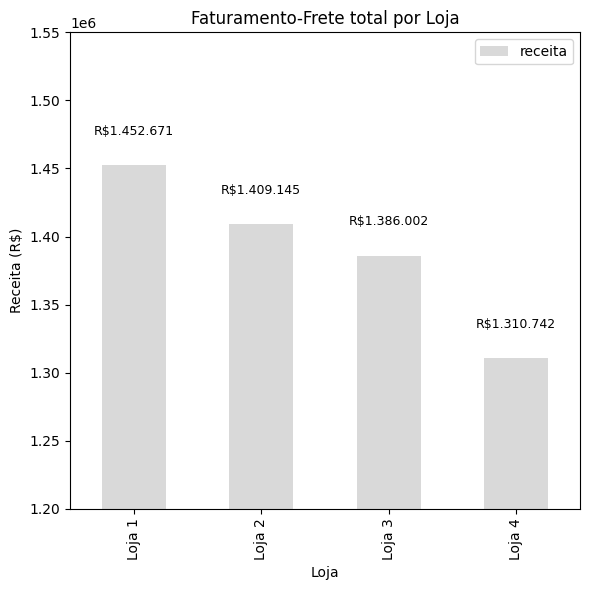

O gráfico acima obtem uma visão financeira do faturamento de cada loja - o custo com frete
Através dessa análise resumida é possível concluir que, mesmo com baixo custo em frete a Loja 4 proporciona o menor lucro dentre as 4 lojas


In [14]:
resumo['receita'] = round(resumo['Faturamento Total'] - resumo['Frete Total'],2)

ax = resumo.plot.bar(x='Loja', y='receita', color='#D9D9D9', figsize=(6, 6))
plt.title('Faturamento-Frete total por Loja')
plt.xlabel('Loja')
plt.ylabel('Receita (R$)')

# Formata os números do eixo Y (pode usar ax.xaxis também)
ax.set_ylim(1200000, 1550000)

for i, valor in enumerate(resumo['receita']):
    ax.text(i, valor + 20000,  # posição: (x, y)
            f'R${valor:,.0f}'.replace(',', '.'),  # texto formatado
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print('O gráfico acima obtem uma visão financeira resumida, considerando o faturamento de cada loja - o custo com frete')
print('Através dessa análise resumida é possível concluir que, mesmo com baixo custo em frete a Loja 4 proporciona o menor lucro dentre as 4 lojas')

## **Satisfação dos consumidores:**
A amostra de vendas coletada das 4 lojas possuí a mesma quantidade de registros, o que não evidencia nenhuma loja que se destaca em volumetria de venda, mas analisando a avaliação média observamos que a Loja 1 é a pior avaliada pelos clientes, com uma avaliação média de 3,98, seguida pela Loja 4 que possuí avaliação de 4,0.

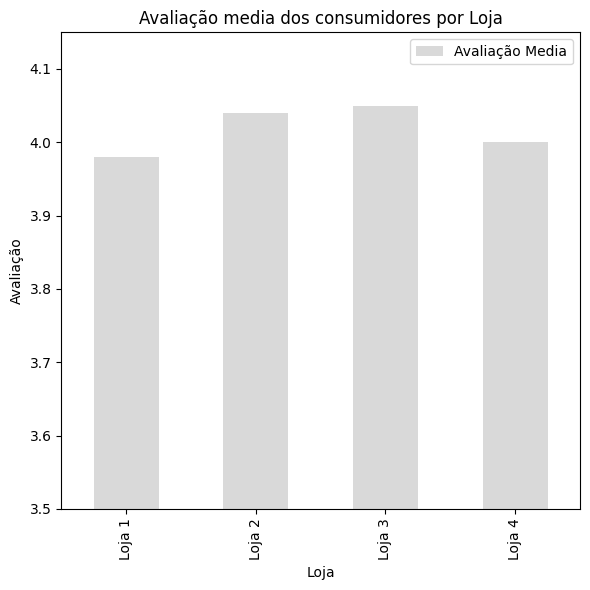

A analise acima mostra a diferença de avaliação dos consumidores entre as 4 lojas
É possível notar que a loja pior avaliada é a loja 1


In [39]:
ax = resumo.plot.bar(x='Loja', y='Avaliação Media', color='#D9D9D9', figsize=(6, 6))
plt.title('Avaliação media dos consumidores por Loja')
plt.xlabel('Loja')
plt.ylabel('Avaliação')

# Formata os números do eixo Y (pode usar ax.xaxis também)
ax.set_ylim(3.5, 4.15)

plt.tight_layout()
plt.show()

print('A analise acima mostra a diferença de avaliação dos consumidores entre as 4 lojas')
print('É possível notar que a loja pior avaliada é a loja 1')


## **Representatividade no mercado:**

As lojas 1, 2 e 3 possuem um segmento de venda bem similar. As categorias com maior volumetria de venda são, em ordem de representatividade: moveis, eletronicos, brinquedos, eletrodomesticos, esporte e lazer
Enquanto a categoria com menor venda é: utilidades domesticas

Já a loja 4 possuí maior representatividade de venda em na venda de utilidades domesticas (ocupa o 6º lugar de categoria mais vendida), porém possuí menor representatividade de venda em eletrodomesticos se comparado as demais (ocupa o 5º lugar de categoria mais vendida)

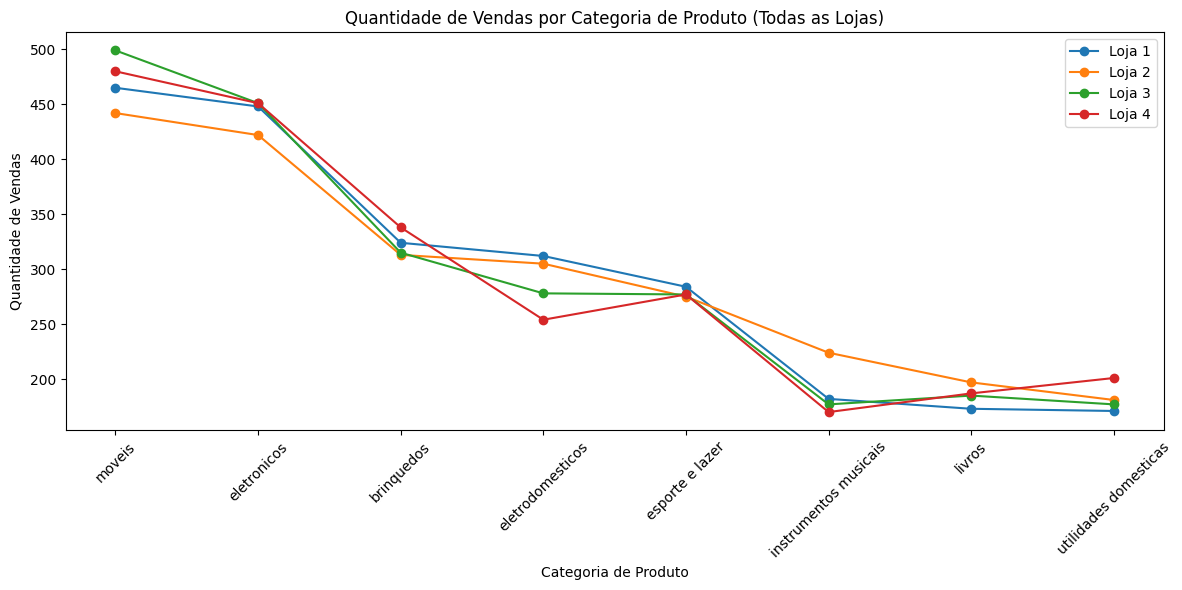

In [56]:
df_completo = pd.DataFrame()

# 2. Contar categorias em cada loja e adicionar ao df_completo
for nome_loja, df_loja in lojas.items():
    contagem = df_loja['Categoria do Produto'].value_counts()
    df_completo[nome_loja] = contagem

# 3. Substituir valores NaN por 0 (caso alguma loja não tenha uma categoria)
df_completo.fillna(0, inplace=True)

# 4. Plotar gráfico de linhas
plt.figure(figsize=(12, 6))
for loja in df_completo.columns:
    plt.plot(df_completo.index, df_completo[loja], label=loja, marker='o')

# 5. Personalização
plt.title('Quantidade de Vendas por Categoria de Produto (Todas as Lojas)')
plt.xlabel('Categoria de Produto')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Conclusão final:

Visando causar o menor impacto nos ganhos financeiros, e preservar a experiência dos consumidores nas lojas mais queridas, a loja mais vantajosa para venda é a Loja 4.

Ela proporciona o pior ganho financeiro, além de ser a 2º loja com menor avaliação pelos consumidores, e, apesar da sua diversidade nas categorias, todas as lojas tem o mesmo conjunto de 5 categorias mais vendidas, e 3 menos vendidas, logo, a "diversificação" causada pelas vendas da Loja 4 não se mostra significativa quando comparada as demais, dentre os dados analisados.
